In [1]:
@everywhere push!(LOAD_PATH, "/home/juser/MacroEmpirica/utilities")

In [2]:
LOAD_PATH
using DataFrames,
  Quandl,
  KernelDensity,
  Distributions,
  low_frequency,
  PyPlot
include("/home/juser/MacroEmpirica/utilities/unitroot.jl");

In [3]:
function lista_1_problema_1(; μ_y = 0., μ_x = 0., τ = 0., φ = 1., Θ = 0.)
    #= Item d)
      Simular um modelo ARMA(1,1) do tipo
      y_t = y_{t-1} + ɛ_t, ɛ ∼ N(0,1)
    =#
    R = 1000; # Número de simulações
    T = 500;  # Tamanho das séries a serem simuladas
    # Simulacao é uma matrix (TxTxr)
    Simul_y = zeros(T, R);
    Simul_x = zeros(T, R);
    for r in 1:R
        Simul_y[:, r] = Simul_ARMA(; μ = μ_y, τ = τ, φ = φ, Θ = Θ, T = T, y_0 = 0)
        Simul_x[:, r] = Simul_ARMA(; μ = μ_x, τ = τ, φ = φ, Θ = Θ, T = T, y_0 = 0)
    end
    T1 = 401:500; T2 = 251:500; T3 = 1:500;
    Tranges = (T1, T2, T3);
    β_r = zeros(R, length(Tranges));
    t_r = zeros(R, length(Tranges));
    Tcount = 1;
    for Trange in Tranges
      for r in 1:R
        x = Simul_x[Trange, r];
        y = Simul_y[Trange, r];
        m = ols(y, x);
        β_r[r, Tcount, :] = m[:"β"];
        t_r[r, Tcount, :] = m[:"t_stat"];
      end
      Tcount = Tcount + 1;
      if Tcount == length(Trange)
        Tcount = 1;
      end
    end
    return β_r, t_r
end

lista_1_problema_1 (generic function with 1 method)

In [4]:
# Problema 1
# Item (d)
β_r, t_r = lista_1_problema_1();
# Trange 1
β_r1 = kde(β_r[:, 1])
β_r2 = kde(β_r[:, 2])
β_r3 = kde(β_r[: ,3])
t_r1 = kde(t_r[:, 1])
t_r2 = kde(t_r[:, 2])
t_r3 = kde(t_r[: ,3]);

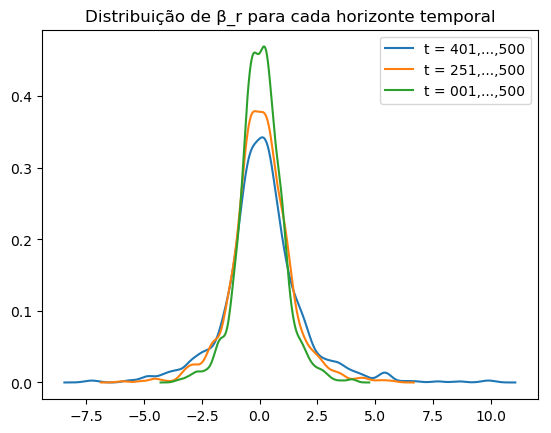

In [5]:
plot(β_r1.x, β_r1.density, label = "t = 401,...,500")
plot(β_r2.x, β_r2.density, label = "t = 251,...,500")
plot(β_r3.x, β_r3.density, label = "t = 001,...,500")
legend()
title("Distribuição de β_r para cada horizonte temporal");

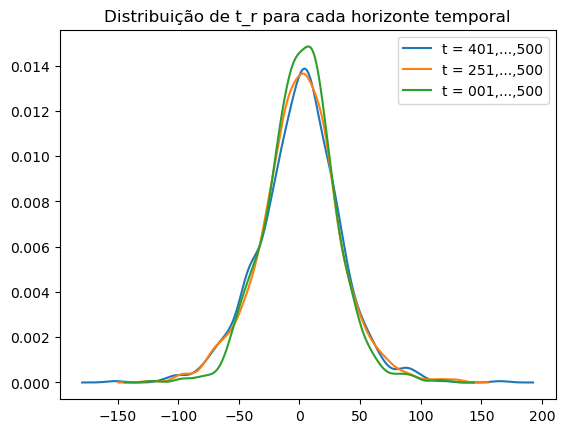

In [6]:
plot(t_r1.x, t_r1.density, label = "t = 401,...,500")
plot(t_r2.x, t_r2.density, label = "t = 251,...,500")
plot(t_r3.x, t_r3.density, label = "t = 001,...,500")
legend()
title("Distribuição de t_r para cada horizonte temporal");

In [7]:
# 3
tmp1 = mean(abs(t_r[:, 1]) .> 1.96)
tmp2 = mean(abs(t_r[:, 2]) .> 1.96)
tmp3 = mean(abs(t_r[:, 3]) .> 1.96)
println("% das estatísticas t : abs(t)>1.96, para cada horizonte temporal")
println("$tmp1"); println("$tmp2"); println("$tmp3")

% das estatísticas t : abs(t)>1.96, para cada horizonte temporal
0.945
0.95
0.942


In [8]:
# Problema 1
# Item (d)
β_r, t_r = lista_1_problema_1(; μ_y = 1/2, μ_x = 1/3, τ = 0., φ = 1., Θ = 0.)
# Trange 1
β_r1 = kde(β_r[:, 1])
β_r2 = kde(β_r[:, 2])
β_r3 = kde(β_r[: ,3])
t_r1 = kde(t_r[:, 1])
t_r2 = kde(t_r[:, 2])
t_r3 = kde(t_r[: ,3]);

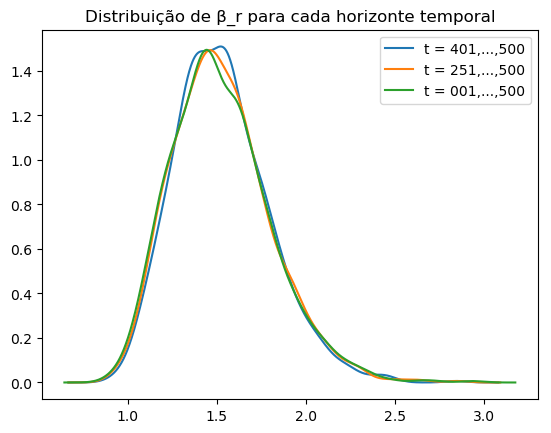

In [9]:
plot(β_r1.x, β_r1.density, label = "t = 401,...,500")
plot(β_r2.x, β_r2.density, label = "t = 251,...,500")
plot(β_r3.x, β_r3.density, label = "t = 001,...,500")
legend()
title("Distribuição de β_r para cada horizonte temporal");

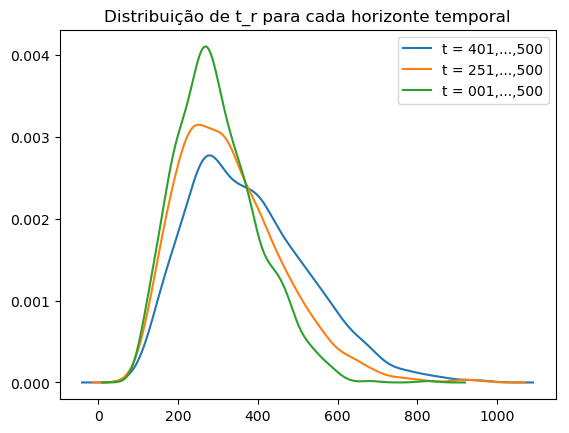

In [10]:
plot(t_r1.x, t_r1.density, label = "t = 401,...,500")
plot(t_r2.x, t_r2.density, label = "t = 251,...,500")
plot(t_r3.x, t_r3.density, label = "t = 001,...,500")
legend()
title("Distribuição de t_r para cada horizonte temporal");

In [11]:
# 3
tmp1 = mean(abs(t_r[:, 1]) .> 1.96)
tmp2 = mean(abs(t_r[:, 2]) .> 1.96)
tmp3 = mean(abs(t_r[:, 3]) .> 1.96)
println("% das estatísticas t : abs(t)>1.96, para cada horizonte temporal")
println("$tmp1"); println("$tmp2"); println("$tmp3")

% das estatísticas t : abs(t)>1.96, para cada horizonte temporal
1.0
1.0
1.0


In [12]:
# Problema 2

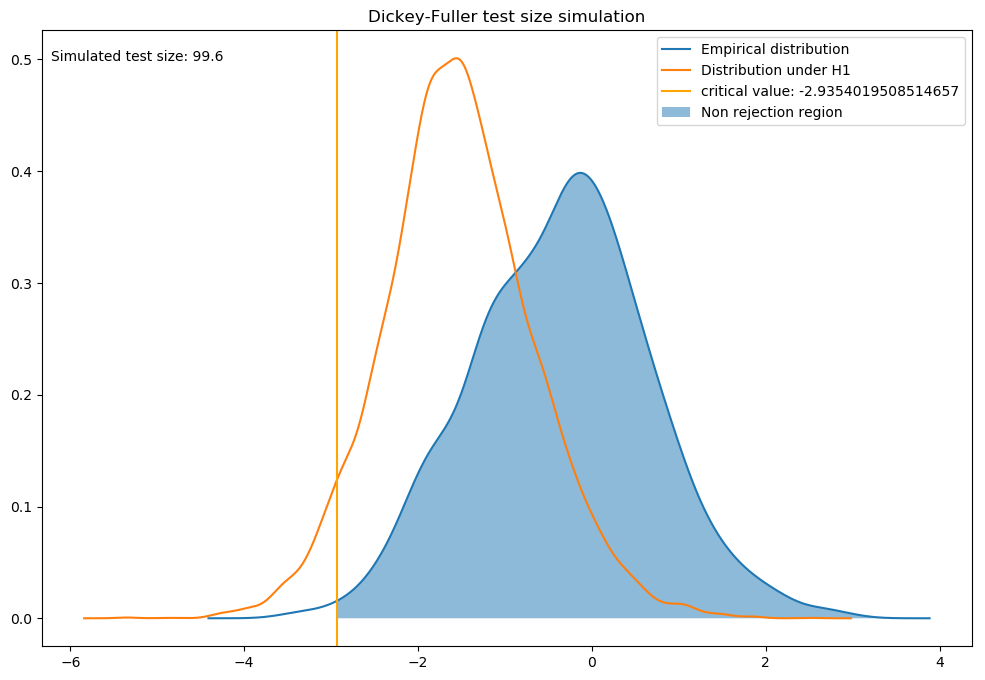

In [13]:
# Cenário 1
μ = .5; φ = 1.0; Θ = 0; T1 = 100; T2 = 200;
function lista_1_problema_2(; μ = μ, φ = φ, Θ = Θ)
    R = 1000; T1 = 100; T2 = 200;
    y1_r = zeros(T1, R);
    y2_r = zeros(T2, R);
    df1_r = zeros(R); 
    df2_r = zeros(R);
    bic1_r = zeros(R);
    bic2_r = zeros(R);
    for r in 1:R
        y1_r[:, r] = Simul_ARMA(; μ = μ, τ = 0., φ = φ, Θ = Θ, T = T1, y_0 = 0);
        y2_r[:, r] = Simul_ARMA(; μ = μ, τ = 0., φ = φ, Θ = Θ, T = T2, y_0 = 0);
        df1_r[r], bic1_r[r] = adftest(y1_r[:, r], 5)
        df2_r[r], bic2_r[r] = adftest(y2_r[:, r], 5)
    end
    return df1_r, df2_r
end
t_dist1, t_crit1 = simulate_dfdist(T1)
t_dist2, t_crit2 = simulate_dfdist(T2)
df1_r, df2_r = lista_1_problema_2(; μ = μ, φ = φ, Θ = Θ)
df_size_plot(df1_r, t_dist1[:"t_μ"], t_crit1[:"t_μ"][2]);

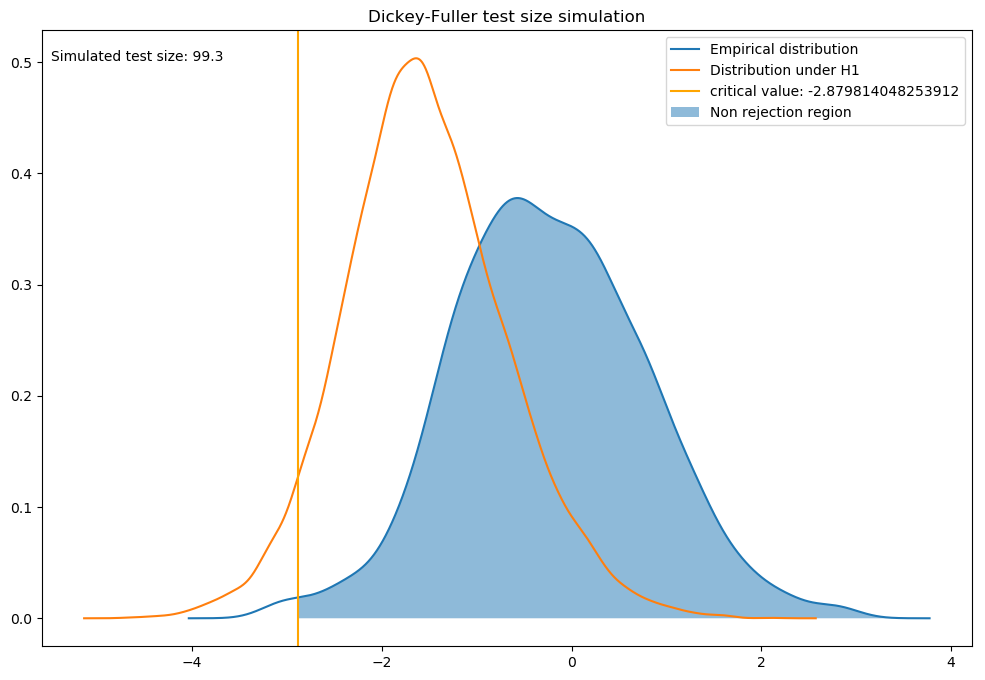

In [14]:
df_size_plot(df2_r, t_dist2[:"t_μ"], t_crit2[:"t_μ"][2]);

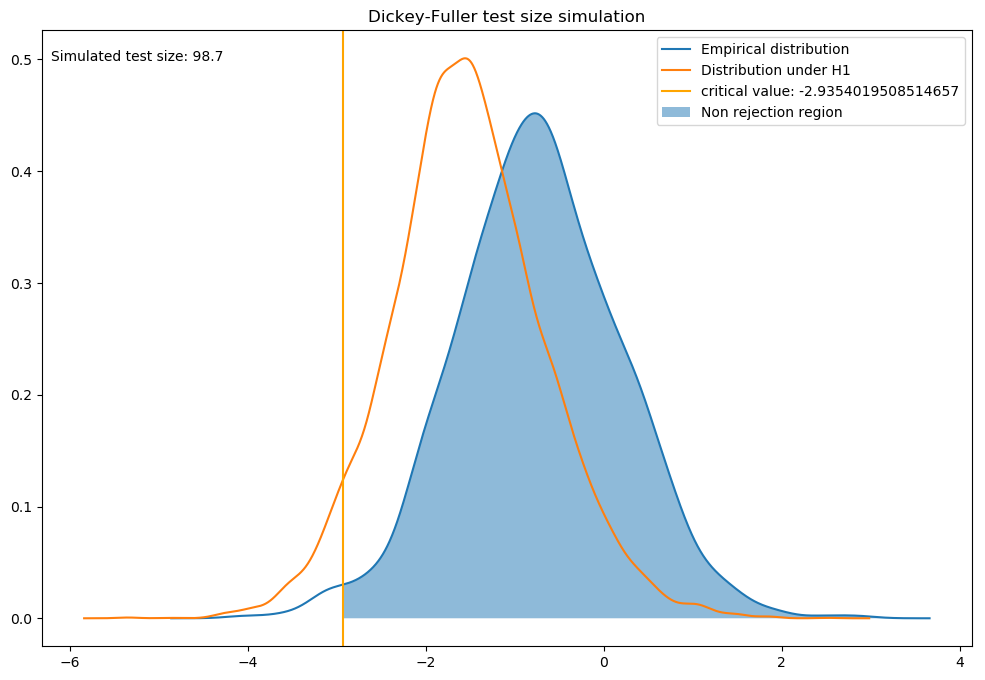

In [15]:
# Cenário 2
μ = .5; φ = 1.0; Θ = .75;
df1_r, df2_r = lista_1_problema_2(; μ = μ, φ = φ, Θ = Θ)
df_size_plot(df1_r, t_dist1[:"t_μ"], t_crit1[:"t_μ"][2]);

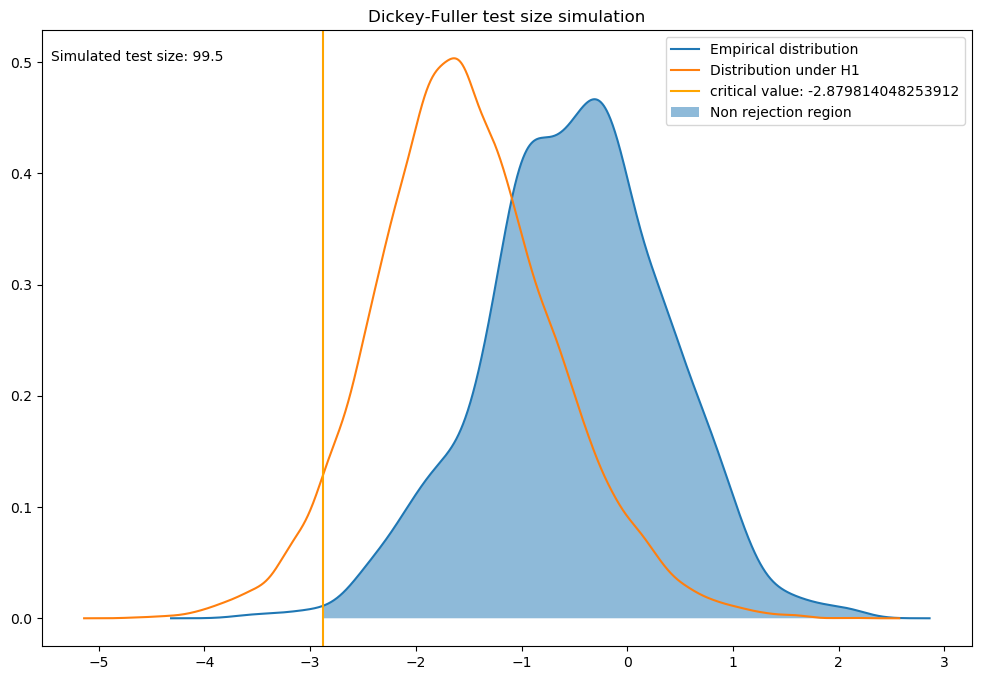

In [16]:
df_size_plot(df2_r, t_dist2[:"t_μ"], t_crit2[:"t_μ"][2]);

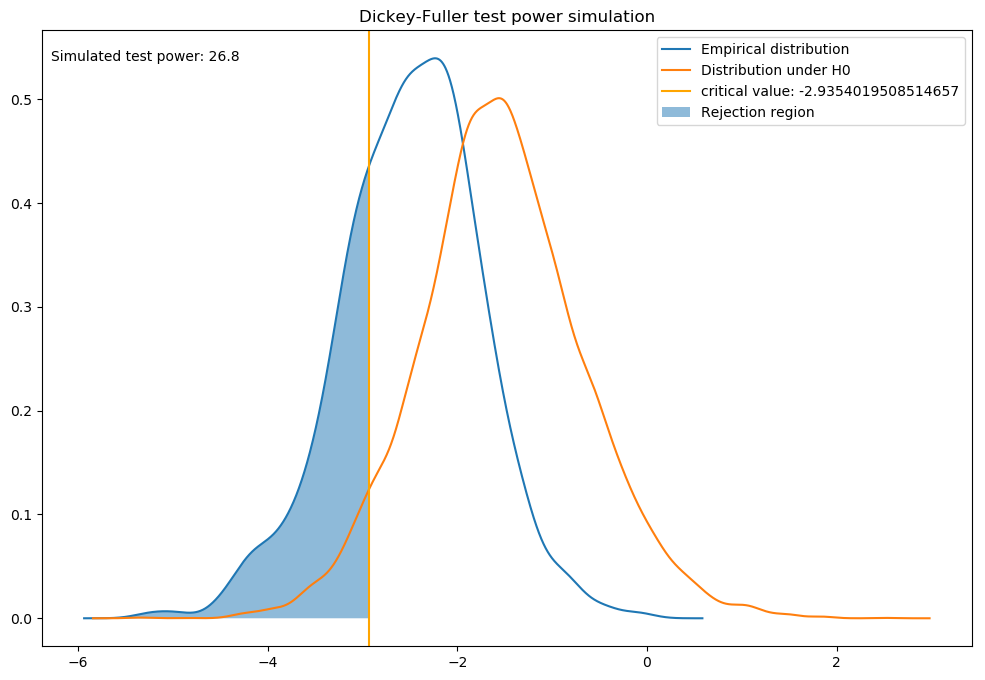

In [17]:
# Cenário 3
μ = .5; φ = .95; Θ = .75;
df1_r, df2_r = lista_1_problema_2(; μ = μ, φ = φ, Θ = Θ)
df_power_plot(df1_r, t_dist1[:"t_μ"], t_crit1[:"t_μ"][2]);

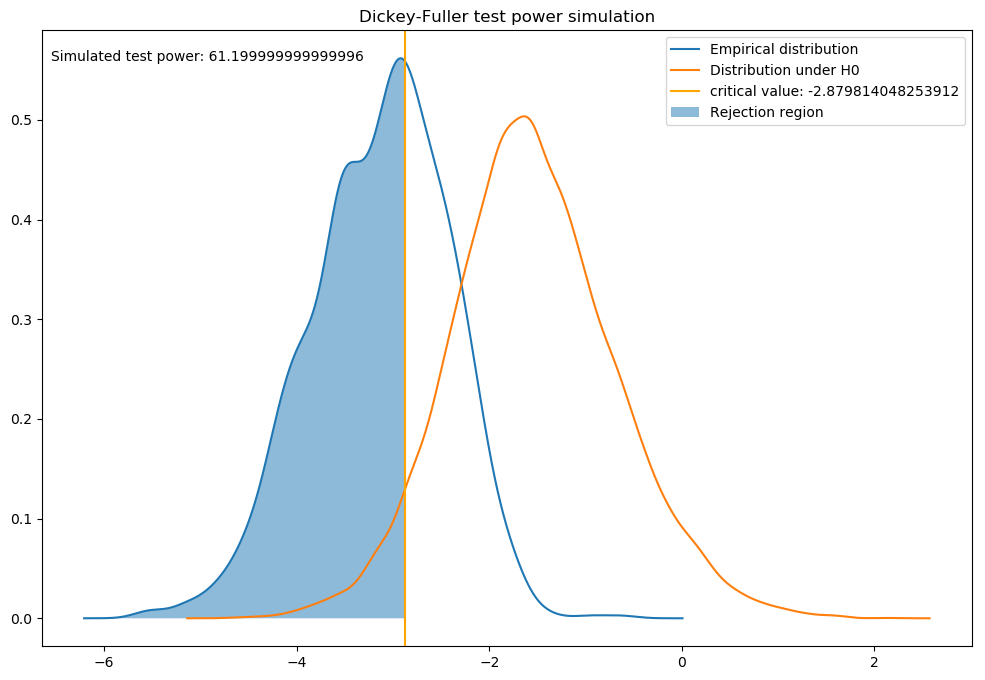

In [18]:
df_power_plot(df2_r, t_dist2[:"t_μ"], t_crit2[:"t_μ"][2]);

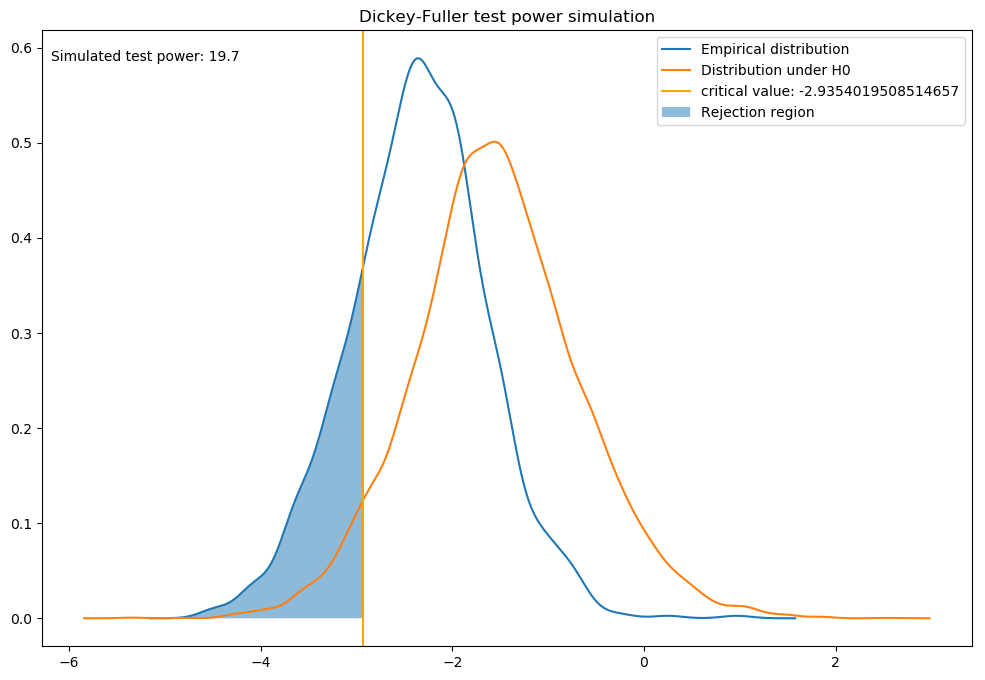

In [19]:
# Cenário 4
μ = .5; φ = .95; Θ = 0.;
df1_r, df2_r = lista_1_problema_2(; μ = μ, φ = φ, Θ = Θ)
df_power_plot(df1_r, t_dist1[:"t_μ"], t_crit1[:"t_μ"][2]);

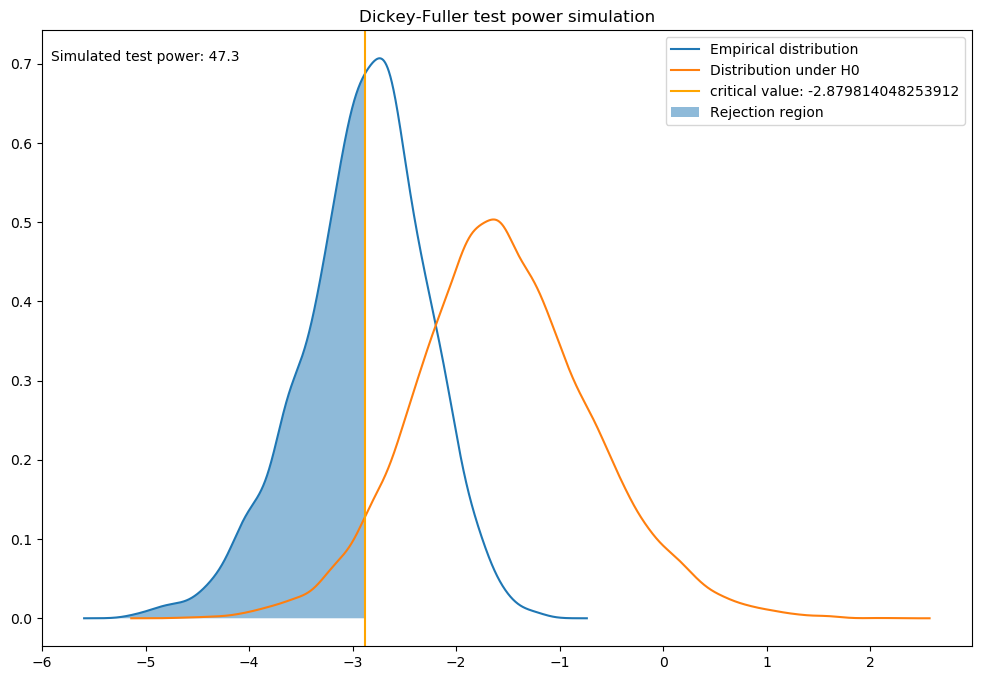

In [20]:
df_power_plot(df2_r, t_dist2[:"t_μ"], t_crit2[:"t_μ"][2]);

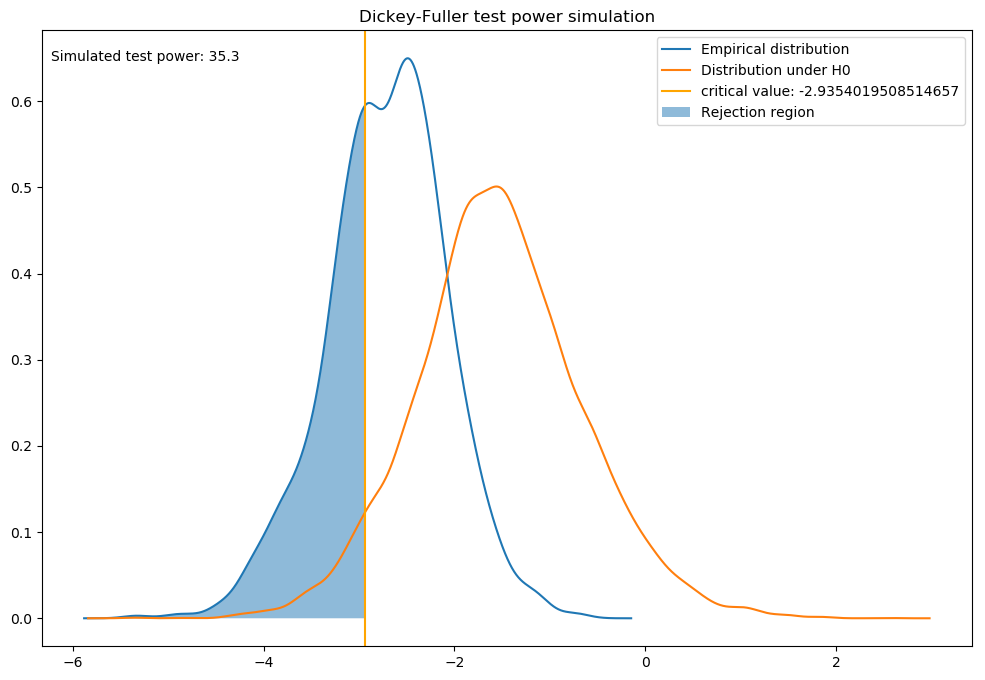

In [21]:
# Cenário 5
μ = .5; φ = .90; Θ = 0.0;
df1_r, df2_r = lista_1_problema_2(; μ = μ, φ = φ, Θ = Θ)
df_power_plot(df1_r, t_dist1[:"t_μ"], t_crit1[:"t_μ"][2]);

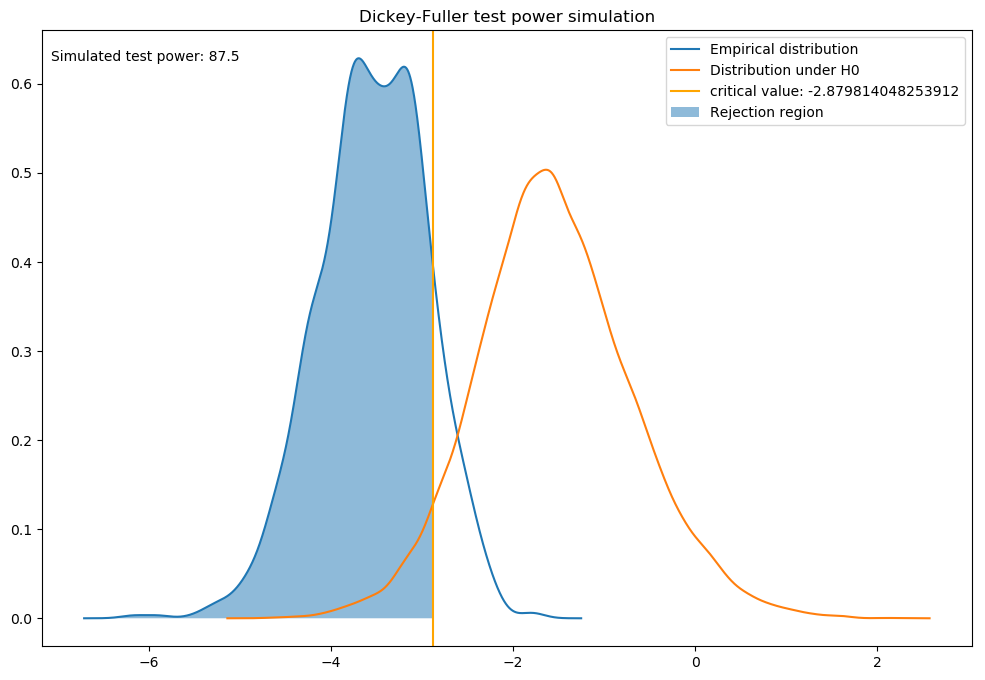

In [22]:
df_power_plot(df2_r, t_dist2[:"t_μ"], t_crit2[:"t_μ"][2]);

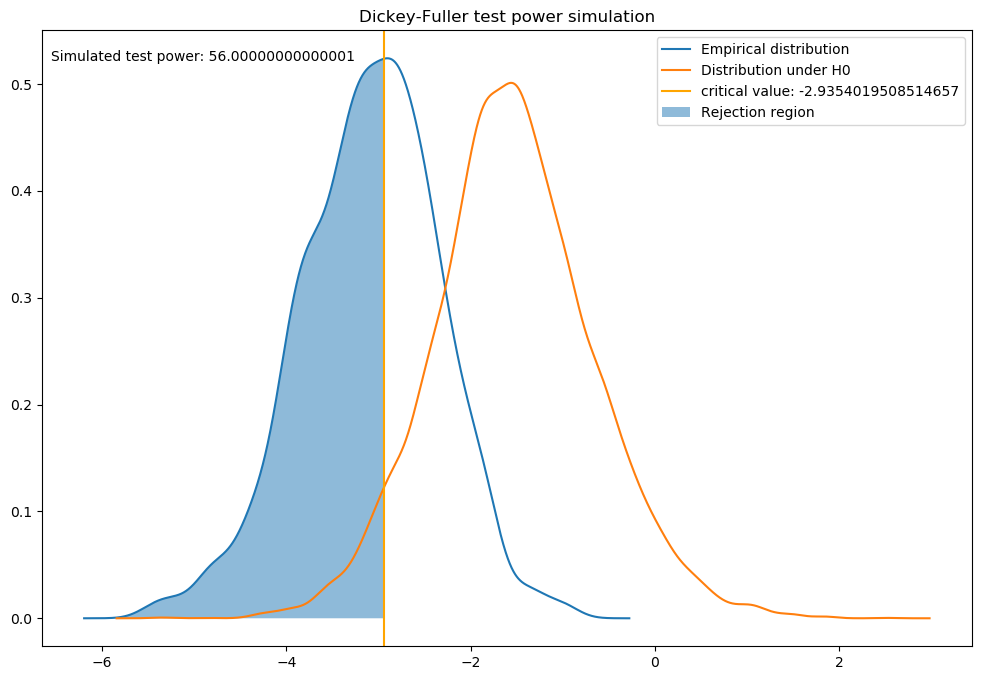

In [23]:
# Cenário 6
μ = .5; φ = .90; Θ = 0.75;
df1_r, df2_r = lista_1_problema_2(; μ = μ, φ = φ, Θ = Θ)
df_power_plot(df1_r, t_dist1[:"t_μ"], t_crit1[:"t_μ"][2]);

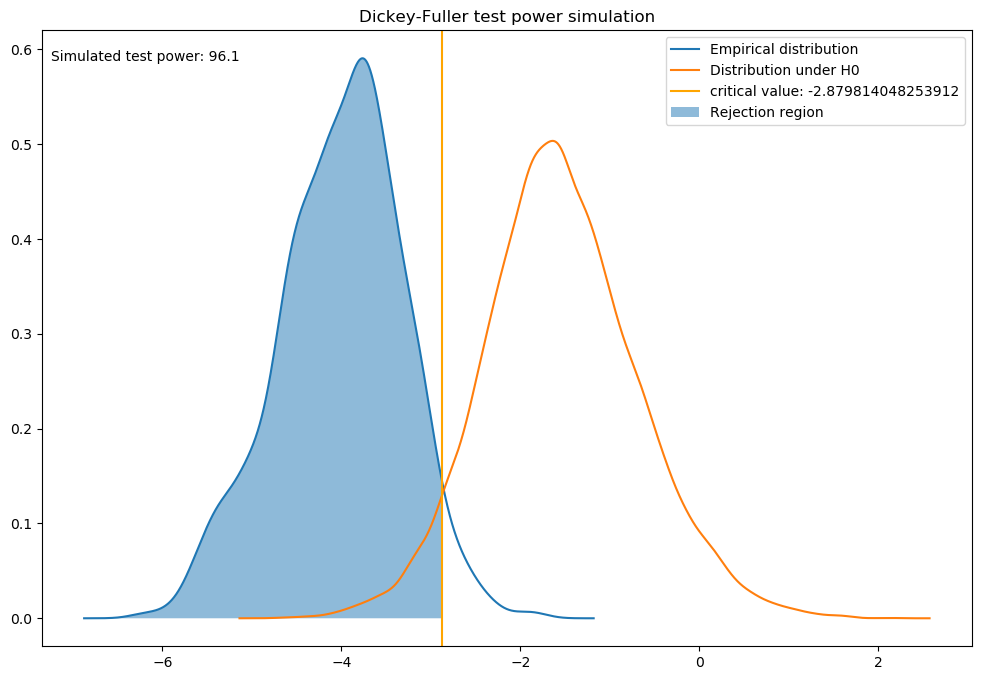

In [24]:
df_power_plot(df2_r, t_dist2[:"t_μ"], t_crit2[:"t_μ"][2]);

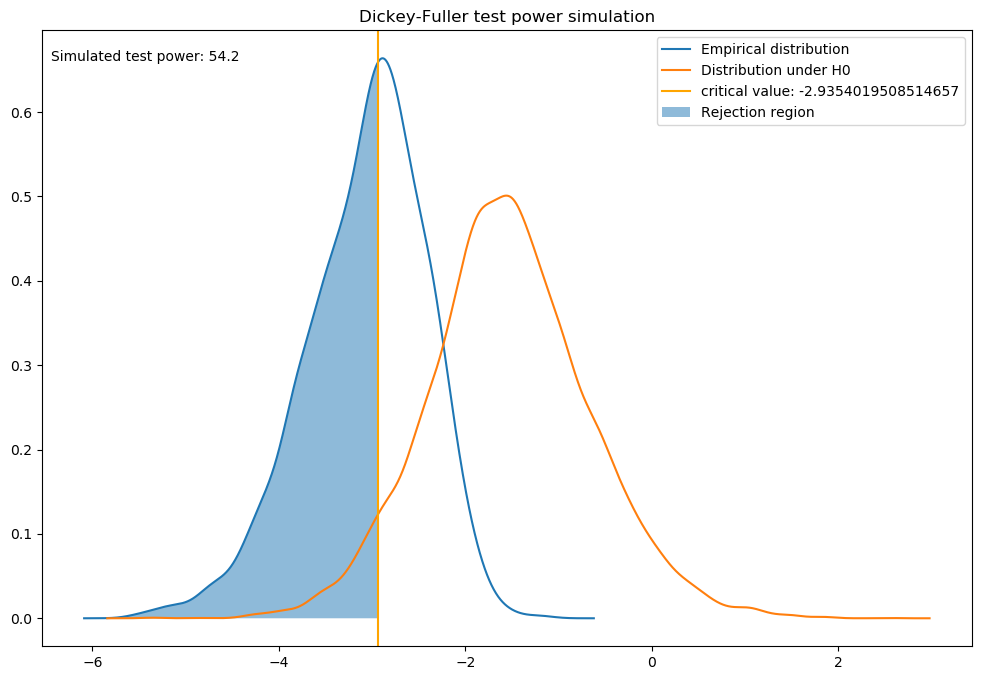

In [25]:
# Cenário 7
μ = .5; φ = .85; Θ = 0.0;
df1_r, df2_r = lista_1_problema_2(; μ = μ, φ = φ, Θ = Θ)
df_power_plot(df1_r, t_dist1[:"t_μ"], t_crit1[:"t_μ"][2]);

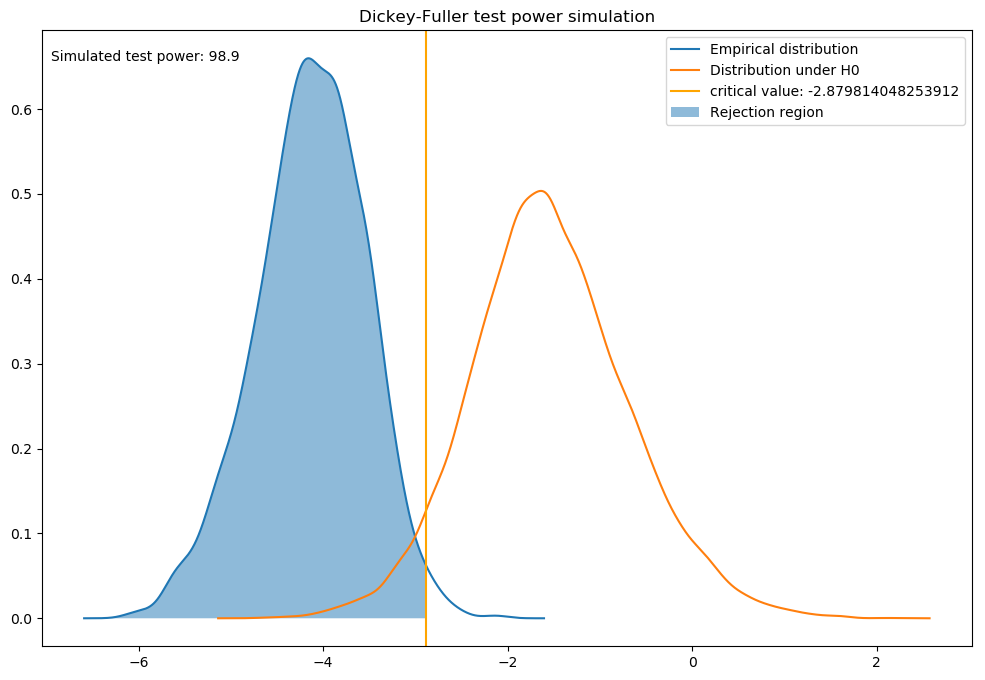

In [26]:
df_power_plot(df2_r, t_dist2[:"t_μ"], t_crit2[:"t_μ"][2]);

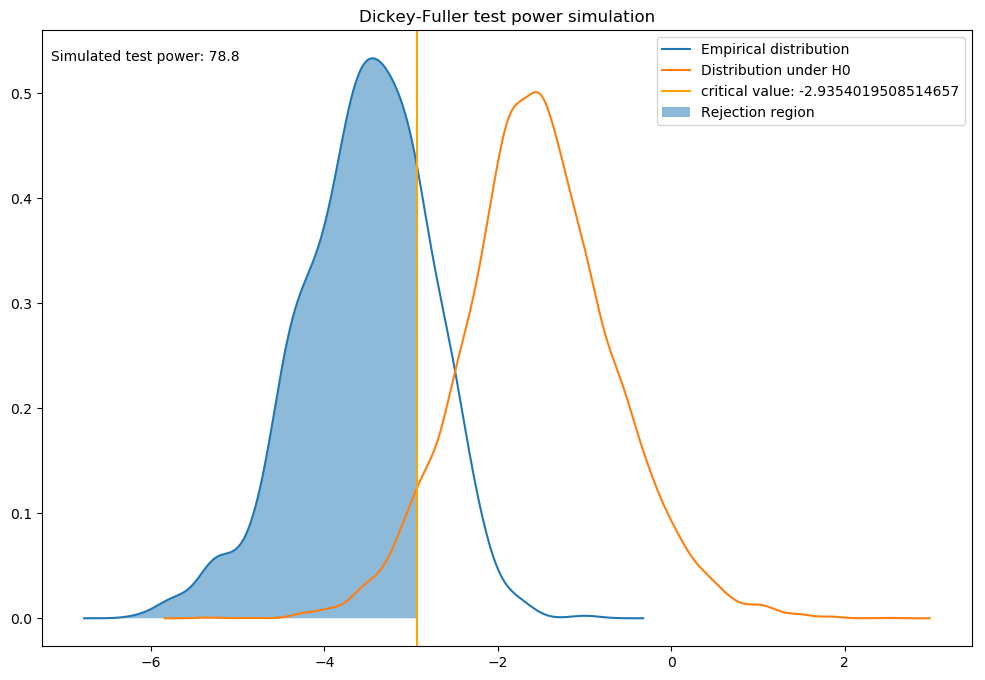

In [27]:
# Cenário 8
μ = .5; φ = .85; Θ = 0.75;
df1_r, df2_r = lista_1_problema_2(; μ = μ, φ = φ, Θ = Θ)
df_power_plot(df1_r, t_dist1[:"t_μ"], t_crit1[:"t_μ"][2]);

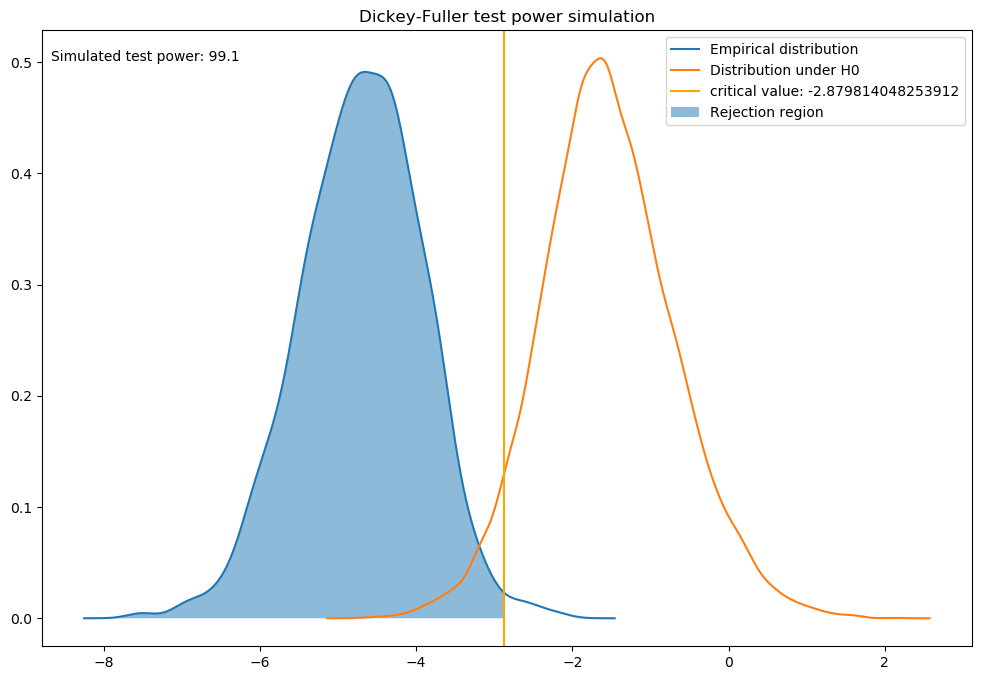

In [28]:
df_power_plot(df2_r, t_dist2[:"t_μ"], t_crit2[:"t_μ"][2]);